In [ ]:
!pip install easyocr
!pip install imutils
!pip install face-recognition

In [ ]:
import cv2
import easyocr
import imutils
import matplotlib.pyplot as plt
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow

# Q1

In [ ]:
img1 = plt.imread('/content/drive/MyDrive/CV/image1.jpg')

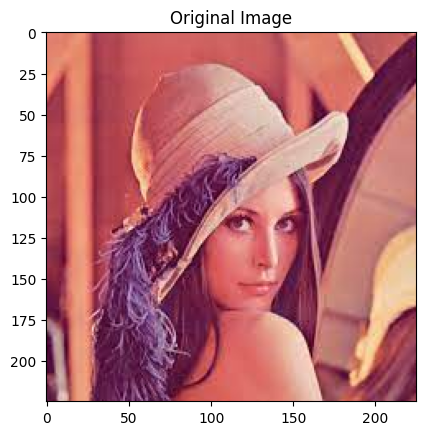

In [ ]:
plt.imshow(img1)
plt.title("Original Image")
plt.show()

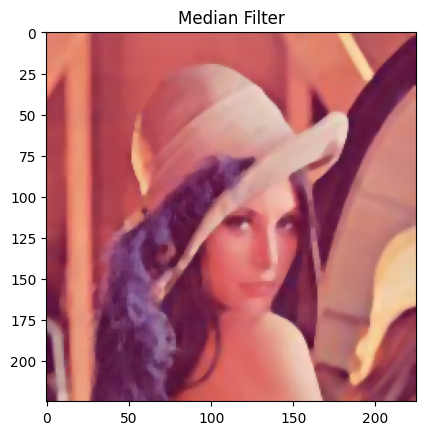

In [ ]:
# Median Filter
median_img1 = cv2.medianBlur(img1, 5)
plt.imshow(median_img1)
plt.title("Median Filter")
plt.show()

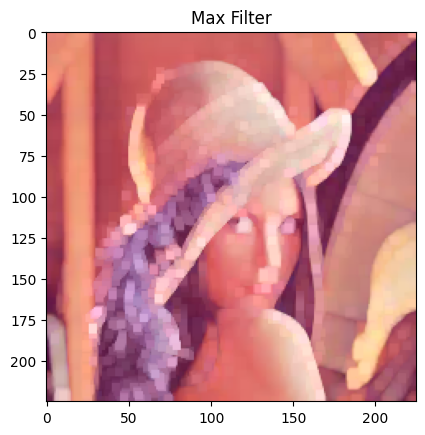

In [ ]:
# Max Filter
max_img1 = cv2.dilate(img1, np.ones((5,5), np.uint8))
plt.imshow(max_img1)
plt.title("Max Filter")
plt.show()

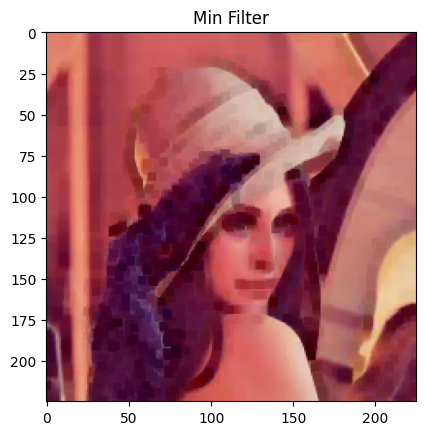

In [ ]:
# Min Filter
min_img1 = cv2.erode(img1, np.ones((5,5), np.uint8))
plt.imshow(min_img1)
plt.title("Min Filter")
plt.show()

# Q2

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/CV/image2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

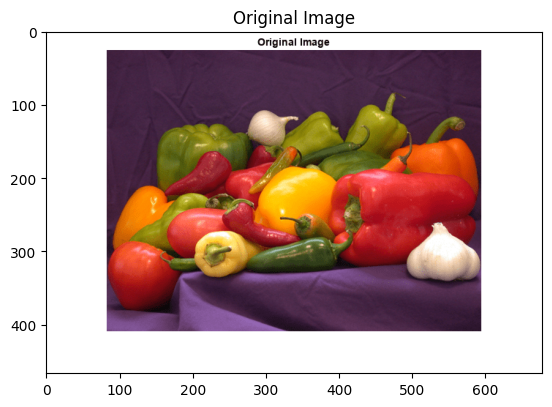

In [ ]:
plt.imshow(img2)
plt.title("Original Image")
plt.show()

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) # convert RGB to gray

In [ ]:
lap_img2 = cv2.Laplacian(img2, cv2.CV_64F) # apply laplacian filter
final_img2 = img2 - lap_img2
final_img2 = np.clip(final_img2, 0, 255) # ensure the range between 0 to 255
final_img2 = cv2.cvtColor(final_img2.astype(np.uint8), cv2.COLOR_GRAY2RGB) # convert gray to RGB

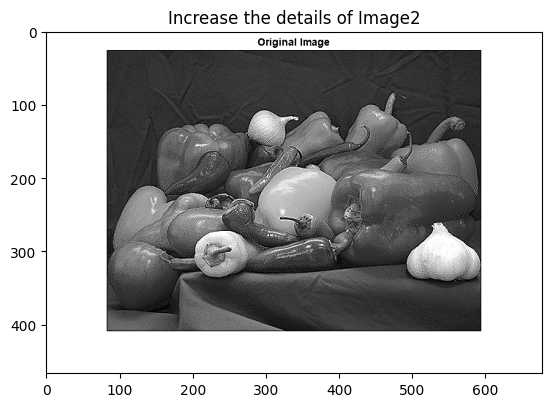

In [ ]:
plt.imshow(final_img2)
plt.title("Increase the details of Image2")
plt.show()

# Q3

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/CV/image3.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.imread('/content/drive/MyDrive/CV/image4.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

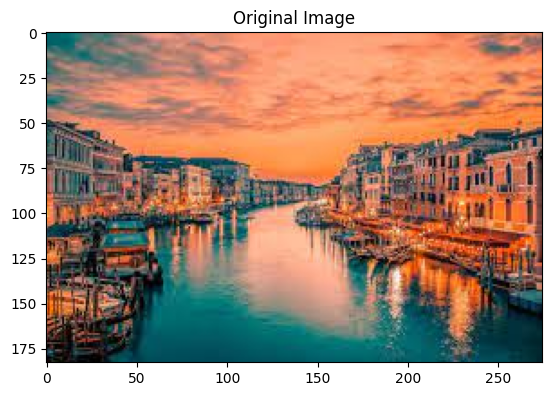

In [ ]:
plt.imshow(img3)
plt.title("Original Image")
plt.show()

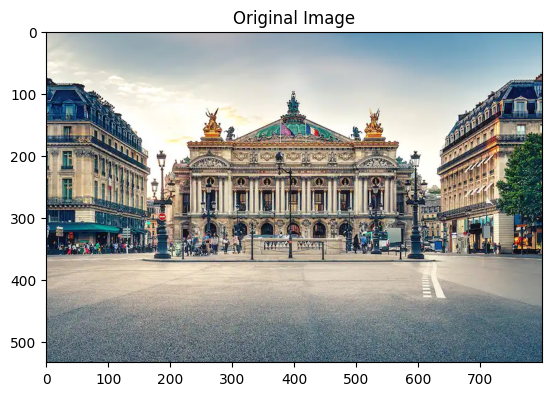

In [ ]:
plt.imshow(img4)
plt.title("Original Image")
plt.show()

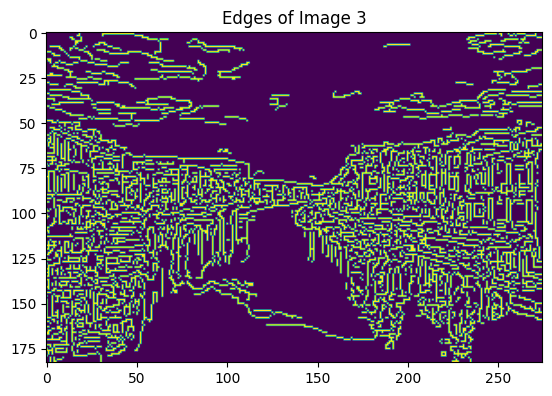

In [ ]:
edges_img3 = cv2.Canny(img3, 100, 200) # Apply Canny Filter with t_lower = 100, t_upper = 200
plt.imshow(edges_img3)
plt.title("Edges of Image 3")
plt.show()

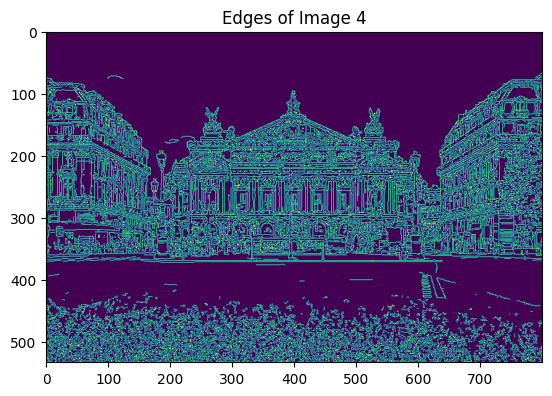

In [ ]:
edges_img4 = cv2.Canny(img4, 100, 200) # Apply the Canny Filter with t_lower = 100, t_upper = 200
plt.imshow(edges_img4)
plt.title("Edges of Image 4")
plt.show()

#Q4

In [ ]:
img5 = cv2.imread('/content/drive/MyDrive/CV/image5.jpg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

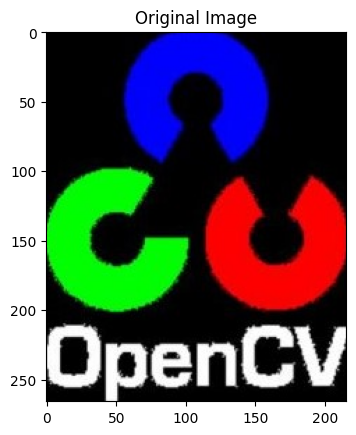

In [ ]:
plt.imshow(img5)
plt.title("Original Image")
plt.show()

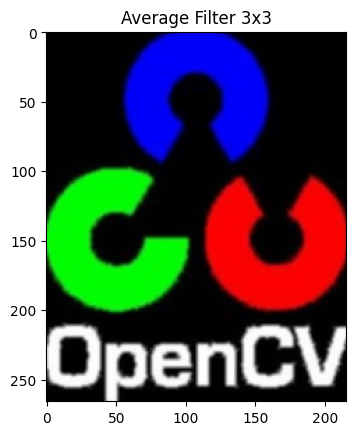

In [ ]:
avg_3x3 = cv2.blur(img5, (3, 3)) # Apply Average Filter with kernel 3x3
plt.imshow(avg_3x3)
plt.title("Average Filter 3x3")
plt.show()

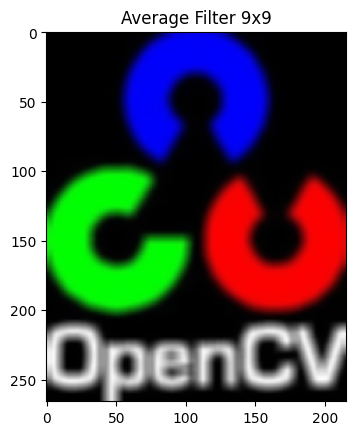

In [ ]:
avg_9x9 = cv2.blur(img5, (9, 9)) # Apply Average Filter with kernel 9x9
plt.imshow(avg_9x9)
plt.title("Average Filter 9x9")
plt.show()

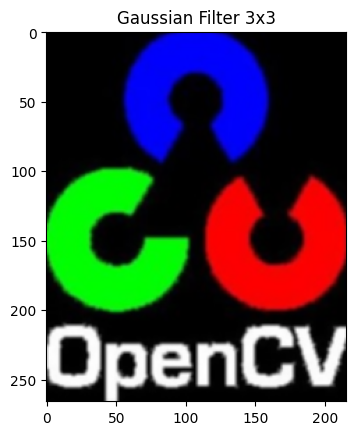

In [ ]:
gaussian_3x3 = cv2.GaussianBlur(img5, (3, 3), 2) # Apply Gaussian Filter with kernel 3x3, sigma = 2
plt.imshow(gaussian_3x3)
plt.title("Gaussian Filter 3x3")
plt.show()

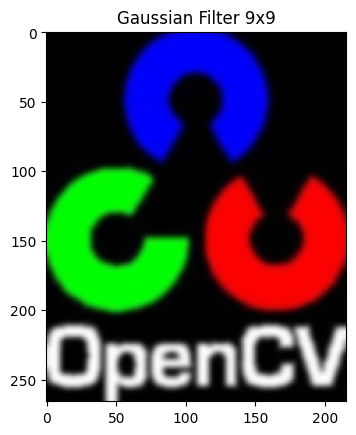

In [ ]:
gaussian_9x9 = cv2.GaussianBlur(img5, (9, 9), 2) # Apply Gaussian Filter with kernel 9x9, sigma = 2
plt.imshow(gaussian_9x9)
plt.title("Gaussian Filter 9x9")
plt.show()

# Q5

In [ ]:
img6_1 = cv2.imread('/content/drive/MyDrive/CV/image6.1.jpg')
img6_1 = cv2.cvtColor(img6_1, cv2.COLOR_BGR2RGB)

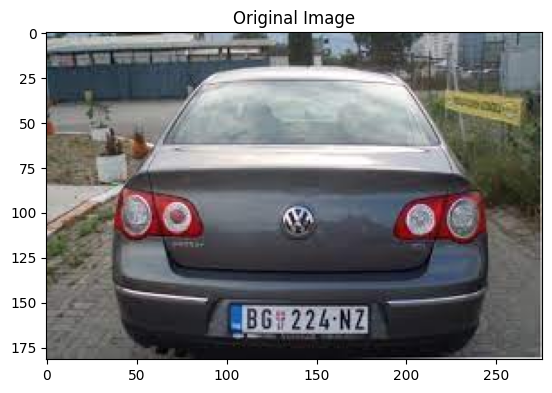

In [ ]:
plt.imshow(img6_1)
plt.title("Original Image")
plt.show()

In [ ]:
gray_img6_1 = cv2.cvtColor(img6_1, cv2.COLOR_RGB2GRAY)

In [ ]:
img6_2 = cv2.imread('/content/drive/MyDrive/CV/image6.2.jpg')
img6_2 = cv2.cvtColor(img6_2, cv2.COLOR_BGR2RGB)

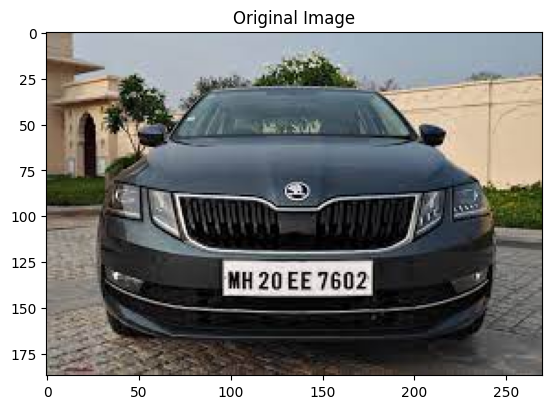

In [ ]:
plt.imshow(img6_2)
plt.title("Original Image")
plt.show()

In [ ]:
gray_img6_2 = cv2.cvtColor(img6_2, cv2.COLOR_RGB2GRAY) # conver RGB to gray

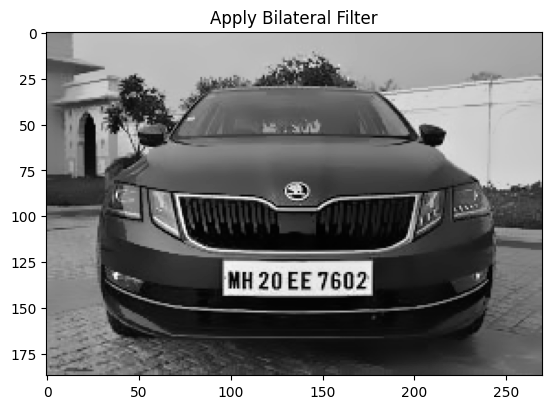

In [ ]:
# d =  10 (diameter of each pixel)
# sigmaColor = sigmaSpace = 15
bil_filter = cv2.bilateralFilter(gray_img6_2, 10, 15, 15) # Apply Bilateral Filter to remove noises
plt.imshow(bil_filter, cmap='gray')
plt.title("Apply Bilateral Filter")
plt.show()

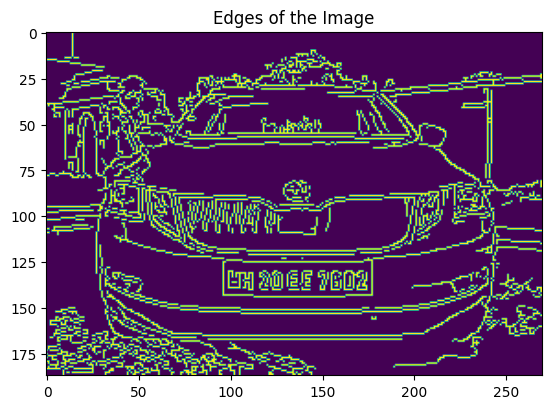

In [ ]:
edges_gray = cv2.Canny(bil_filter, 30, 200) # Apply Canny Filter with t_lower = 30, t_upper = 200
plt.imshow(edges_gray)
plt.title("Edges of the Image")
plt.show()

In [ ]:
findconts = cv2.findContours(edges_gray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # find contours of the image
contours = imutils.grab_contours(findconts) # extract the contours
contours = sorted(contours, key=cv2.contourArea, reverse=True) # sort the contours
# find the location of the contours with 4 sides with a tolerance of 10
location = next((cv2.approxPolyDP(contour, 10, True) for contour in contours if len(cv2.approxPolyDP(contour, 10, True)) == 4), None)
# create a mask of the image
mask = np.zeros(gray_img6_2.shape, np.uint8)
# draw contours for location with value 255
plate = cv2.drawContours(mask, [location], 0, 255, -1)
# bitwise AND between the original image and the mask
plate = cv2.bitwise_and(img6_2, img6_2, mask=mask)

In [ ]:
coordinates = np.column_stack(np.where(mask == 255)) # find non-zero elements in the mask
(x1, y1) = coordinates.min(axis=0) # min coordinates
(x2, y2) = coordinates.max(axis=0) # max coordiantes
crop_img = gray_img6_2[x1:x2+1, y1:y2+1] # crop the image

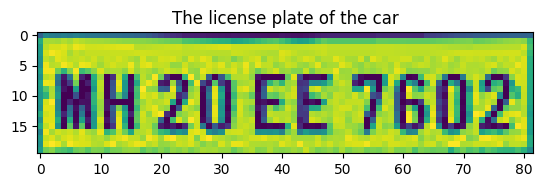

In [ ]:
plt.imshow(crop_img)
plt.title("The license plate of the car")
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(crop_img)
plate_car = result[0][-2]
print("License Plate: "+ plate_car)

License Plate: MH 20 EE 7602


# Q6

In [ ]:
known_faces = ["/content/drive/MyDrive/CV/Eftekhari.jpg"]
known_names = ["Efi"]

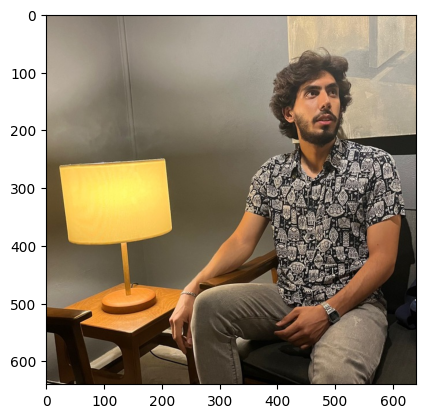

In [ ]:
known_image = cv2.imread(known_faces[0])
known_image = cv2.cvtColor(known_image, cv2.COLOR_BGR2RGB)
plt.imshow(known_image)
plt.show()

In [ ]:
encode_faces = []
for face in known_faces:
    image = face_recognition.load_image_file(face) # load images
    encoding = face_recognition.face_encodings(image)[0] # encode the face
    encode_faces.append(encoding) # append the encoded face

In [ ]:
unknown_img_path = "/content/drive/MyDrive/CV/Eftekhari-toDetect.jpg"
unknown_image = face_recognition.load_image_file(unknown_img_path) # load an unknown image
unk_face_cords = face_recognition.face_locations(unknown_image) # find the locations of faces in the image
unk_face_encodings = face_recognition.face_encodings(unknown_image, unk_face_cords) # encode the uknown face

In [ ]:
matches = face_recognition.compare_faces(encode_faces, unk_face_encodings[0]) # compare the faces with knowns faces
name = "Unknown"
for i, match in enumerate(matches):
  if match:
    name = known_names[i]
    print(f'Found "{name}" in the image.')
    break

if name == "Unknown": # the face couldn't be recognized
  print("New person's face detected!")
  known_faces.append(unknown_img_path) # add the path of the face the unknown person
  name_newPerson = input("Enter the name of the new person: ")
  known_names.append(name_newPerson) # add the name of the new person
  print("New person's information added.")

Found "Efi" in the image.


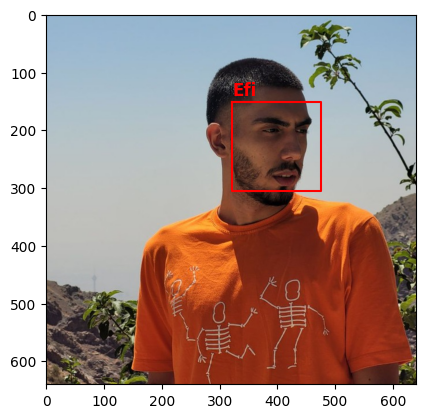

In [ ]:
plt.imshow(unknown_image)
for face_location in unk_face_cords:
    top = face_location[0]
    right = face_location[1]
    bottom = face_location[2]
    left = face_location[3]
    plt.plot([left, right, right, left, left], [top, top, bottom, bottom, top], 'r') # first list = X coordinates, second list = Y coordinates
    plt.text(left, top - 10, name, color='red', fontsize=12, weight='bold')

plt.show()

# Q7

In [ ]:
img7 = cv2.imread('/content/drive/MyDrive/CV/image7.jpg')
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)

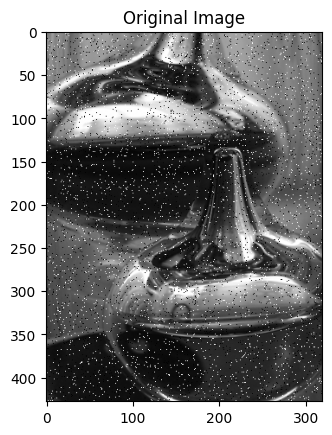

In [ ]:
plt.imshow(img7)
plt.title("Original Image")
plt.show()

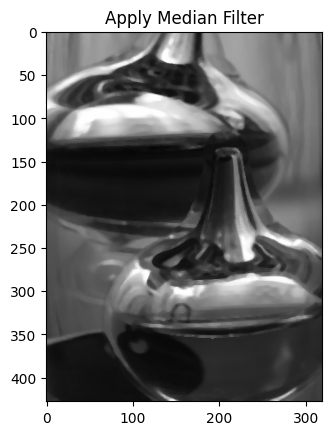

In [ ]:
median_img7 = cv2.medianBlur(img7, 5) # Apply Median Filter with kernel 5x5
plt.imshow(median_img7)
plt.title("Apply Median Filter")
plt.show()

# Q8

In [ ]:
img8_1 = cv2.imread('/content/drive/MyDrive/CV/image8.1.jpg')
img8_1 = cv2.cvtColor(img8_1, cv2.COLOR_BGR2RGB)

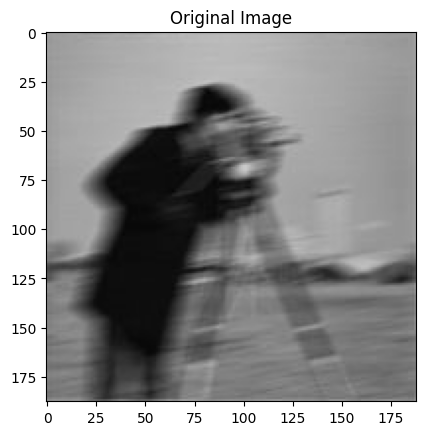

In [ ]:
plt.imshow(img8_1)
plt.title("Original Image")
plt.show()

In [ ]:
bil_img8_1 = cv2.bilateralFilter(img8_1, 10, 75, 75) # Apply Bilateral Filter , d (diameter of each pixel) = 10, sigmaColor = sigmaSpace = 75

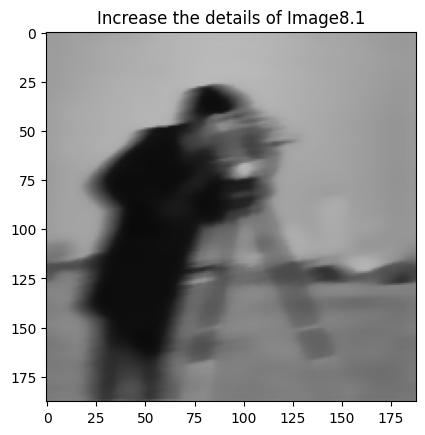

In [ ]:
plt.imshow(bil_img8_1)
plt.title("Increase the details of Image8.1")
plt.show()

In [ ]:
img8_2 = cv2.imread('/content/drive/MyDrive/CV/image8.2.jpg')

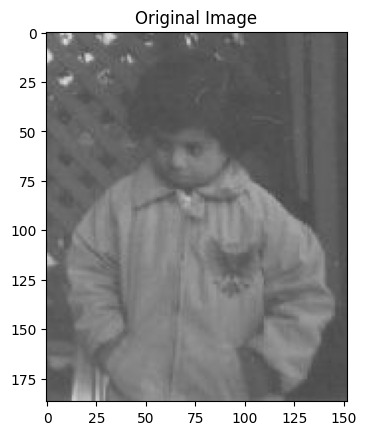

In [ ]:
plt.imshow(img8_2)
plt.title("Original Image")
plt.show()

In [ ]:
img8_2 = cv2.cvtColor(img8_2, cv2.COLOR_BGR2GRAY) # convert BGR to gray
lap_img8_2 = cv2.Laplacian(img8_2, cv2.CV_64F) # apply laplacian filter
final_img8_2 = img8_2 - lap_img8_2
final_img8_2 = np.clip(final_img8_2, 0, 255) # ensure the range between 0 to 255
final_img8_2 = cv2.cvtColor(final_img8_2.astype(np.uint8), cv2.COLOR_GRAY2RGB) # convert gray to RGB

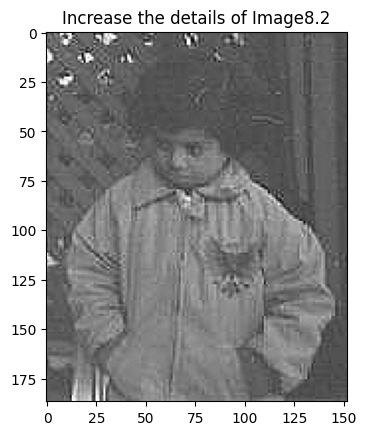

In [ ]:
plt.imshow(final_img8_2, cmap='gray')
plt.title("Increase the details of Image8.2")
plt.show()

In [ ]:
img8_3 = cv2.imread('/content/drive/MyDrive/CV/image8.3.jpg')
img8_3 = cv2.cvtColor(img8_3, cv2.COLOR_BGR2GRAY)

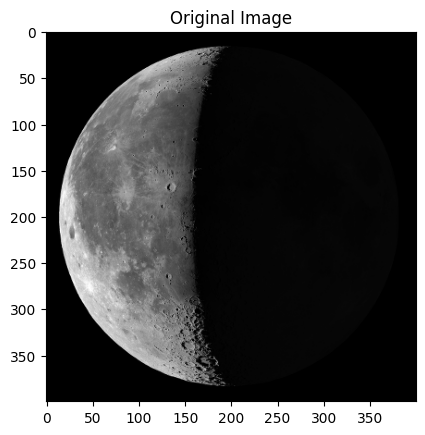

In [ ]:
plt.imshow(img8_3, cmap='gray')
plt.title("Original Image")
plt.show()

In [ ]:
lap_img8_3 = cv2.Laplacian(img8_3, cv2.CV_64F) # apply laplacian filter
final_img8_3 = img8_3 - lap_img8_3
final_img8_3 = np.clip(final_img8_3, 0, 255) # ensure the range between 0 to 255
final_img8_3 = cv2.cvtColor(final_img8_3.astype(np.uint8), cv2.COLOR_GRAY2RGB) # convert gray to RGB

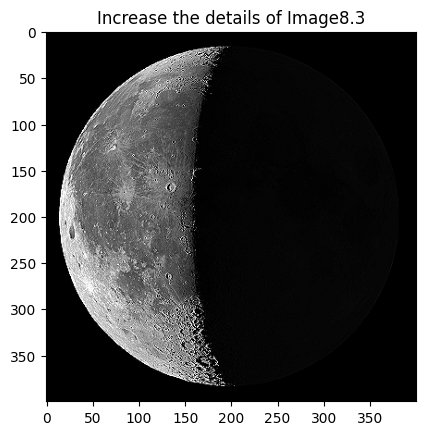

In [ ]:
plt.imshow(final_img8_3)
plt.title("Increase the details of Image8.3")
plt.show()